# Playing With Pandas II

In this module, we will explore some more functionalities of Pandas and also introduce `seaborn`.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Concat and Merging

### Concat

In [8]:
df1 = pd.DataFrame({'Name': ['Harry', 'Hari'], 'Age': [20, 24]})
df1

Name  Age
0  Harry   20
1   Hari   24

In [9]:
df2 = pd.DataFrame({'Name': ['Ace', 'Chris'], 'Age': [26, 27]})
df2

Name  Age
0    Ace   26
1  Chris   27

In [13]:
pd.concat([df1, df2])

Name  Age
0  Harry   20
1   Hari   24
0    Ace   26
1  Chris   27


### Exercise 1:

Concat `df1` and `df3` horizontally. (Set axis).

In [120]:
df3 = pd.DataFrame({'Nationality': ['English', 'Nepalese']})
print(df3)

  Nationality
0     English
1    Nepalese


In [122]:
pd.concat([df1,df3],axis=1)

Name  Age Nationality
0  Harry   20     English
1   Hari   24    Nepalese

## Football Data

In this notebook, we'll work with a [European Football Dataset](https://www.kaggle.com/hugomathien/soccer).

In [0]:
!wget -O football.zip "https://drive.google.com/uc?export=download&id=1nfOVo0L19JEwoihBmyzb8YIK4F05Tyyz"
!unzip football.zip
!ls football/

--2019-10-25 00:10:57--  https://drive.google.com/uc?export=download&id=1nfOVo0L19JEwoihBmyzb8YIK4F05Tyyz
Resolving drive.google.com (drive.google.com)... 108.177.126.101, 108.177.126.113, 108.177.126.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l13hknfarig6ld0kjf2meooh2a9v2one/1571961600000/11127307224014928214/*/1nfOVo0L19JEwoihBmyzb8YIK4F05Tyyz?e=download [following]
--2019-10-25 00:11:00--  https://doc-04-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l13hknfarig6ld0kjf2meooh2a9v2one/1571961600000/11127307224014928214/*/1nfOVo0L19JEwoihBmyzb8YIK4F05Tyyz?e=download
Resolving doc-04-44-docs.googleusercontent.com (doc-04-44-docs.googleusercontent.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to doc-04-44-docs.googleusercontent.com (do

### Merge

In [18]:
countries = pd.read_csv('football/Country.csv')
countries.head()

id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy

In [19]:
leagues = pd.read_csv('football/League.csv')
leagues.head()

id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A

In [45]:
dfp1 = pd.merge(countries, leagues, how='inner', left_on='id', right_on='country_id')
dfp_1

id_x       name_x   id_y  country_id                    name_y
0       1      Belgium      1           1    Belgium Jupiler League
1    1729      England   1729        1729    England Premier League
2    4769       France   4769        4769            France Ligue 1
3    7809      Germany   7809        7809     Germany 1. Bundesliga
4   10257        Italy  10257       10257             Italy Serie A
5   13274  Netherlands  13274       13274    Netherlands Eredivisie
6   15722       Poland  15722       15722        Poland Ekstraklasa
7   17642     Portugal  17642       17642  Portugal Liga ZON Sagres
8   19694     Scotland  19694       19694   Scotland Premier League
9   21518        Spain  21518       21518           Spain LIGA BBVA
10  24558  Switzerland  24558       24558  Switzerland Super League

### Exercise 2

Import and merge `Player.csv` and `Player_Attributes.csv`.

Find the right column to merge on. 

In [88]:
players = pd.read_csv('football/Player.csv')
p_attributes = pd.read_csv('football/Player_Attributes.csv')
print(players.info())
# print(players.head())
print("\n\n\n\n")
print(p_attributes.info())
# print(p_attributes.head())
dfp2 = pd.merge(players,p_attributes, how='inner',left_on='player_api_id',right_on='player_fifa_api_id')
print(dfp2.head())
dfp3= pd.merge(dfp1,dfp2,how="inner",left_on="name_y",right_on='player_name')
# Code Here
#players = ...
#p_attributes = ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-n

## Grouping

In [37]:
df = pd.DataFrame({'Name': ['Harry', 'Hari', 'Peter', 'Sita'], 
                   'Height': [170, 160, 180, 165],
                   'Nationality': ['English', 'Nepalese', 'English', 'Nepalese']})
df

Name  Height Nationality
0  Harry     170     English
1   Hari     160    Nepalese
2  Peter     180     English
3   Sita     165    Nepalese

In [50]:

df.groupby('Nationality')['Height'].mean()

Nationality
English     175.0
Nepalese    162.5
Name: Height, dtype: float64

### Exercise 3

Group the players by `preferred_foot` and find mean `height` and `weight`.

In [83]:
print(dfp2.info())
dfp2.groupby('preferred_foot')['height'].mean()
# Code Here

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5523 entries, 0 to 5522
Data columns (total 49 columns):
id_x                    5523 non-null int64
player_api_id_x         5523 non-null int64
player_name             5523 non-null object
player_fifa_api_id_x    5523 non-null int64
birthday                5523 non-null object
height                  5523 non-null float64
weight                  5523 non-null int64
id_y                    5523 non-null int64
player_fifa_api_id_y    5523 non-null int64
player_api_id_y         5523 non-null int64
date                    5523 non-null object
overall_rating          5489 non-null float64
potential               5489 non-null float64
preferred_foot          5489 non-null object
attacking_work_rate     5446 non-null object
defensive_work_rate     5489 non-null object
crossing                5489 non-null float64
finishing               5489 non-null float64
heading_accuracy        5489 non-null float64
short_passing           5489 non-null f

preferred_foot
left     181.956177
right    181.385531
Name: height, dtype: float64

Extra: Group players by birth year (Extract year from birth-date) and find mean `height` and `weight` by that.

### Exercise 4

Find a way to merge teams (`Team.csv`) and countries (`Country.csv`). 

(Note: Search in other csvs).

In [228]:
teams = pd.read_csv('football/Team.csv')
print(teams.head(20))

print('\n\n\n01---------------------------------------------------------------------------------------------\n\n\n')

print(countries.head(20))
print(countries.query('id==1034'))
print('\n\n\n02---------------------------------------------------------------------------------------------\n\n\n')

matches = pd.read_csv('football/match.csv')

print('\n\n\n03 ---------------------------------------------------------------------------------------------\n\n\n')

print(matches.head())
dfp6=pd.DataFrame(matches,columns=['country_id','home_team_api_id'])
dfp6.columns=['country_id','team_api_id']

dfp7=pd.DataFrame(matches,columns=['country_id','away_team_api_id'])
dfp7.columns=['country_id','team_api_id']

dfp8=dfp6.append(dfp7)
print('\n\n\n03a ---------------------------------------------------------------------------------------------\n\n\n')

dfp8=dfp8.groupby(['team_api_id'],as_index=False).first()

dfp9=pd.merge(countries,dfp8, how='inner',left_on='id',right_on='country_id')
dfp10=pd.merge(teams,dfp9, how='inner',left_on='team_api_id',right_on='team_api_id')

dfp10=dfp10[['country_id','name','team_api_id','team_short_name','team_long_name']]
print(dfp8.head())
print('\n\n\n---------------------------------------------------------------------------------------------\n\n\n')
print(dfp10.head())
print(dfp10.groupby(['country_id']).count() )


      id  team_api_id  team_fifa_api_id        team_long_name team_short_name
0      1         9987             673.0              KRC Genk             GEN
1      2         9993             675.0          Beerschot AC             BAC
2      3        10000           15005.0      SV Zulte-Waregem             ZUL
3      4         9994            2007.0      Sporting Lokeren             LOK
4      5         9984            1750.0     KSV Cercle Brugge             CEB
5      6         8635             229.0        RSC Anderlecht             AND
6      7         9991             674.0              KAA Gent             GEN
7      8         9998            1747.0             RAEC Mons             MON
8      9         7947               NaN         FCV Dender EH             DEN
9     10         9985             232.0     Standard de Liège             STL
10    11         8203          110724.0           KV Mechelen             MEC
11    12         8342             231.0        Club Brugge KV   

## Free Explorations

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [75]:
import seaborn as sns

### Exercise 5

Scatterplot `height` and `weight` of players. See `lmplot`.

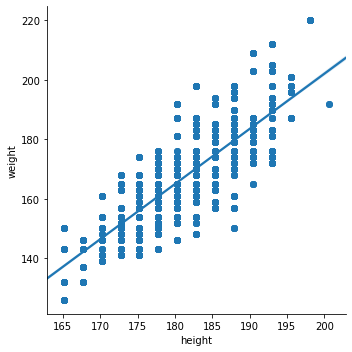

In [78]:
sns.lmplot(x='height',y='weight',data = dfp2)
#Code Here

### Exercise 6

Find team name length by country. 

Extra: `violinplot` it.

In [124]:
#Code Here
print(teams.query('team_short_name=="BAR"'))
print(countries.query('name=="Spain"'))
dft = pd.merge(teams,countries,how="inner",left_on='id',right_on='id')
print(dft.head())


        id  team_api_id  team_fifa_api_id team_long_name team_short_name
144  21280         9976            1848.0           Bari             BAR
258  43042         8634             241.0   FC Barcelona             BAR
      id   name
9  21518  Spain
   id  team_api_id  team_fifa_api_id team_long_name team_short_name     name
0   1         9987             673.0       KRC Genk             GEN  Belgium


### Exercise 7

Q. Which league is the most high-scoring?

In [131]:
#Code Here
matches=pd.read_csv('football/Match.csv')

print(matches.head())
print(leagues.head())
print(teams.head())


     id  country_id  league_id     season  stage                 date  \
0  1489           1          1  2015/2016      1  2015-07-24 00:00:00   
1  1490           1          1  2015/2016      1  2015-07-25 00:00:00   
2  1491           1          1  2015/2016      1  2015-07-25 00:00:00   
3  1492           1          1  2015/2016      1  2015-07-25 00:00:00   
4  1493           1          1  2015/2016      1  2015-07-25 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  SJA  \
0       1979832              9997              8342               2  ...  NaN   
1       1979833              8571              9985               2  ...  NaN   
2       1979834              9987              1773               3  ...  NaN   
3       1979835              8573              8203               3  ...  NaN   
4       1979836             10000              9994               3  ...  NaN   

   VCH  VCD   VCA  GBH  GBD  GBA  BSH  BSD  BSA  
0  4.4  4.0  1.75  NaN  

### Exercise 8

Q. Which league is the most one-sided?

In [0]:
#Code Here

### Exercise 9

Q1. What is the distribution of team names by first letters? 

In [0]:
#Code Here

Q2. Remove 'FC's from names.

In [0]:
#Code Here

Q3. Generate first letter vs country `heatmap`.

Hint: Use `pivot`.

In [0]:
#Code Here

## Resources

* [Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial)
* [Choosing the right chart: suggestions](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)
